# Các công cụ toán học

## Các phép toán bitwise

### Cú pháp hàm

Ví dụ API cho `cv2.bitwise_and()`. Các hàm khác bao gồm: `cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`

``` python
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Mảng đầu ra có cùng kích thước và kiểu với các mảng đầu vào.

Hàm có **2 đối số bắt buộc**:

1. `src1`: mảng đầu vào đầu tiên hoặc một số vô hướng.

2. `src2`: mảng đầu vào thứ hai hoặc một số vô hướng.

Một đối số tùy chọn quan trọng là:

1. `mask`: phép toán tùy chọn mask, mảng kênh đơn 8 bit, chỉ định các phần tử của mảng đầu ra cần thay đổi.

### Tài liệu OpenCV

1. <a href="https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html" target="_blank">Các phép toán số học trên hình ảnh</a>

2. <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14" target="_blank">hàm bitwise_and(...)</a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

(200, 499)


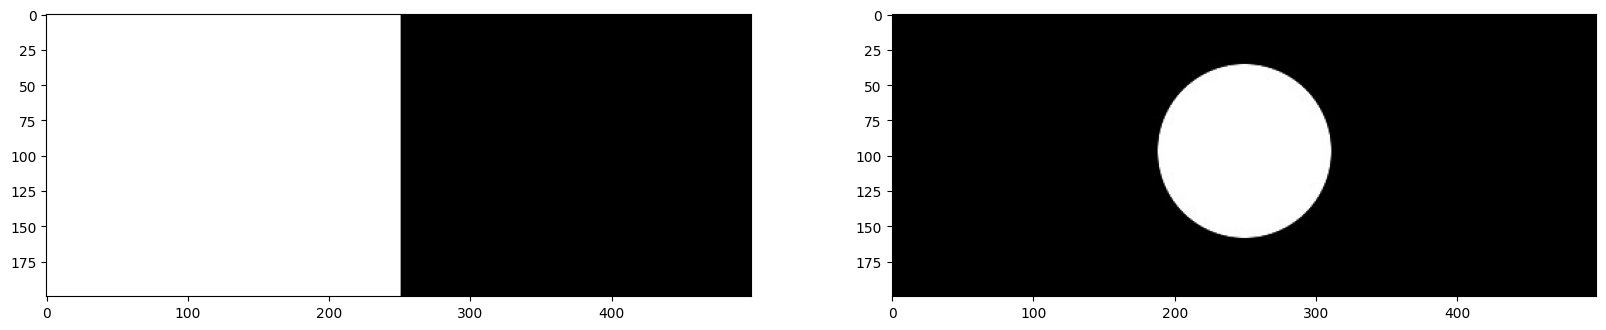

In [2]:
img_rec = cv2.imread("images/rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("images/circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
print(img_rec.shape)

### Toán tử AND bitwise

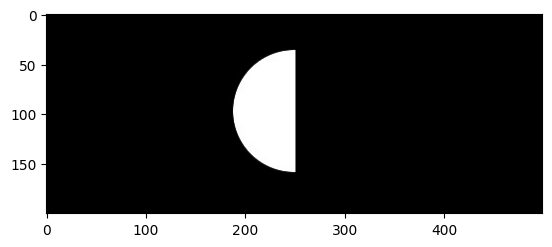

In [3]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### Toán tử OR bitwise

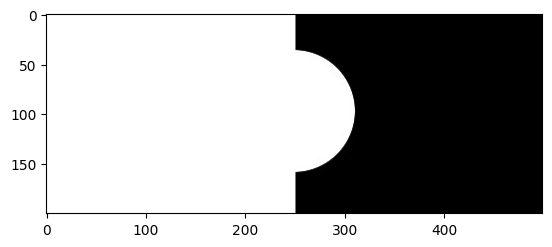

In [4]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

### Toán tử XOR bitwise

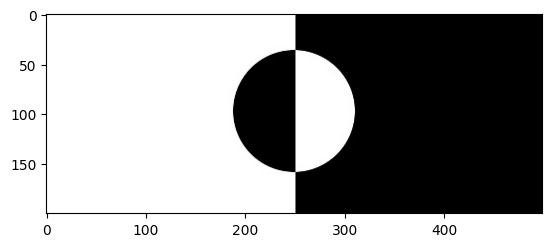

In [5]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

# Mini Project: Chỉnh sửa Logo

Tô chữ màu trắng của logo Coca-Cola bên dưới bằng hình ảnh nền.

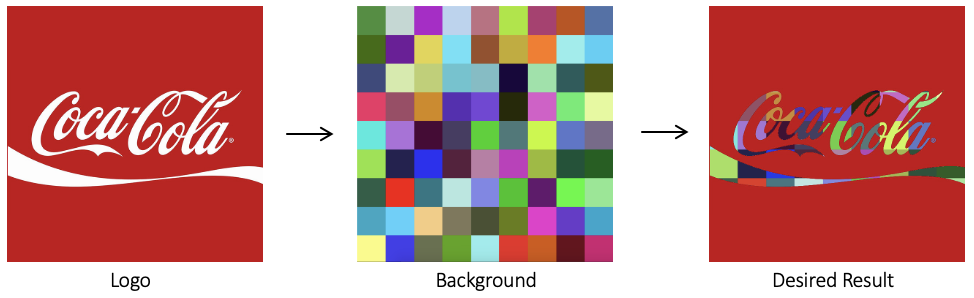

In [6]:
Image(filename='images/Logo_Manipulation.png')

### Đọc hình ảnh nền trước

(700, 700, 3)


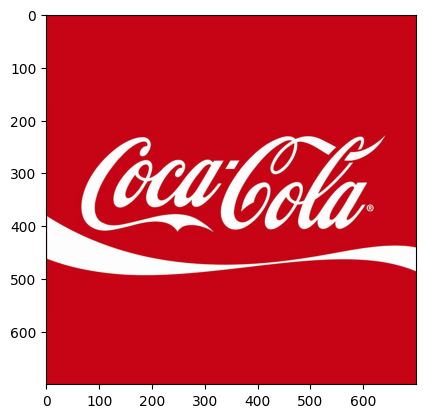

In [7]:
img_bgr = cv2.imread("images/coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_h = img_rgb.shape[0]
logo_w = img_rgb.shape[1]

### Đọc hình nền

(700, 700, 3)


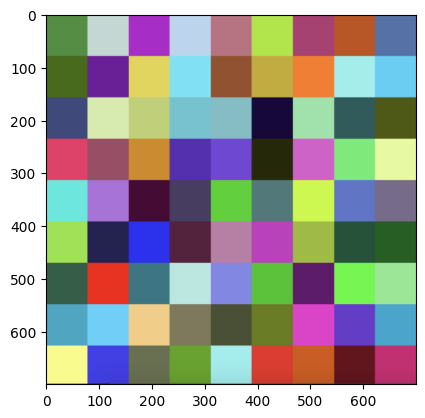

In [8]:
# Đọc trong hình ảnh nền cheackerboad màu
img_background_bgr = cv2.imread("images/checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Thay đổi kích thước hình nền thành cùng kích thước với hình ảnh logo
img_background_rgb = cv2.resize(img_background_rgb, (logo_w, logo_h), interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### Tạo Mặt nạ cho Hình ảnh gốc

(700, 700)


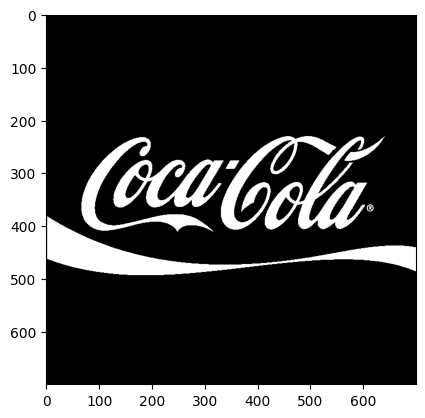

In [9]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Áp dụng ngưỡng toàn cục để tạo mặt nạ nhị phân của logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

### Đảo ngược Mặt nạ

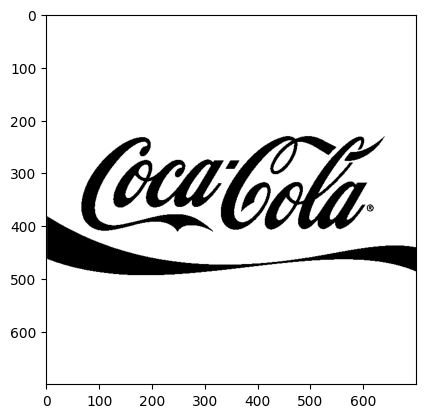

In [10]:
# Tạo mặt nạ đảo ngược
img_mask_inv = cv2.bitwise_not(img_mask)
#img_mask_inv = img_mask
plt.imshow(img_mask_inv, cmap="gray")

### Áp dụng nền cho Mặt nạ

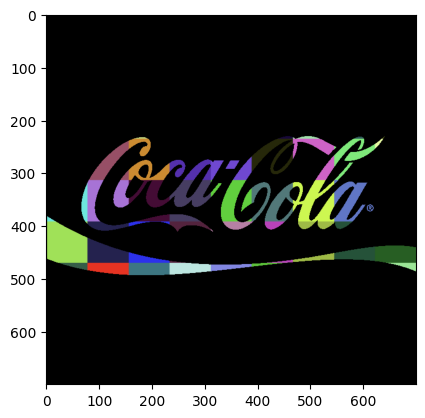

In [11]:
# Tạo nền nhiều màu "phía sau" chữ logo
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### Tách biệt tiền cảnh khỏi hình ảnh

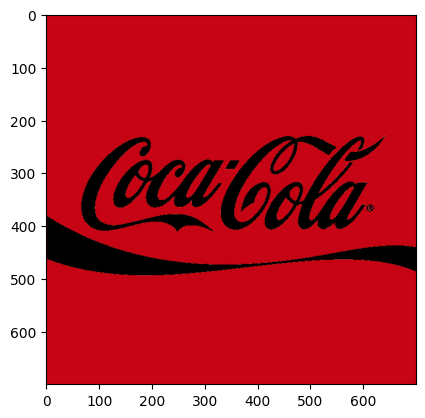

In [12]:
# Tách nền trước (màu đỏ khỏi ảnh gốc) bằng cách sử dụng mặt nạ đảo ngược
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### Kết quả: Hợp nhất Tiền cảnh và Hậu cảnh

True

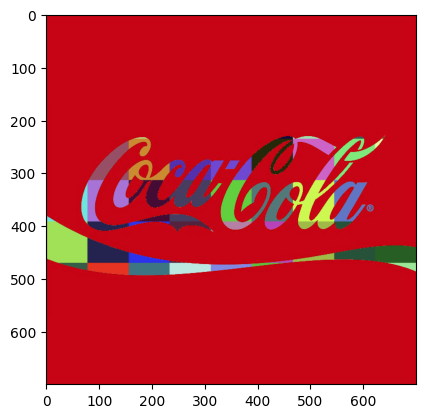

In [13]:
# Cộng hai kết quả trước đó để có được kết quả cuối cùng
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("images/logo_final.png", result[:, :, ::-1])